# Name : Tazmeen Afroz 
# Roll No: 22P-9252
# BAI-4A


In [1]:
import pandas as pd 
data = pd.read_csv('total_data_na.csv')
data.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Select relevant features for clustering
features = data[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

features = features.replace('-', np.nan)
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled


array([[ 0.00943771,  0.40323538, -0.03937894, ..., -1.08126244,
        -1.3206071 , -1.1344344 ],
       [ 1.98807763,  1.78437691,  2.14671767, ..., -1.08126244,
        -1.3206071 , -1.1344344 ],
       [-0.39658378,  0.40323538,  2.72461691, ..., -1.08126244,
        -1.3206071 , -1.1344344 ],
       ...,
       [-0.75685636, -1.04068531, -1.04039365, ..., -0.04270068,
         0.36491249,  0.11820146],
       [-0.75685636, -1.04068531, -1.04039365, ...,  0.53372595,
         2.31419659, -0.23128002],
       [-0.75685636, -1.04068531, -1.04039365, ...,  0.42191906,
         0.23624687,  0.82894469]])

In [6]:
k_means = KMeans(n_clusters=3, random_state= 42, n_init=10)
k_means.fit(features_scaled)

centroids = k_means.cluster_centers_
identified_clusters = k_means.fit_predict(features_scaled)

data['Cluster'] = identified_clusters

data.head()


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0,0,0,0,0.0,0,0,0,0,1
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0,0,0,0,0.0,0,0,0,0,2
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0,0,0,0,0.0,0,0,0,0,1
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0,0,0,0,0.0,0,0,0,0,1
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0,0,0,0,0.0,0,0,0,0,1



Labels:
[1 2 1 1 1 2 0 0 0 0 0 0 1 0 2 2 0 0 0 1 0 1 0 1 0 0 2 0 1 1 1 0 0 0 0 1 1
 1 0 0 2 0 2 1 1 1 0 0 2 0 1 1 1 0 0 1 0 0 0 0 0 2 1 1 0 1 1 0 1 0 0 0 1 2
 1 1 1 2 1 0 2 0 2 0 1 0 2 1 0 0 2 2 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


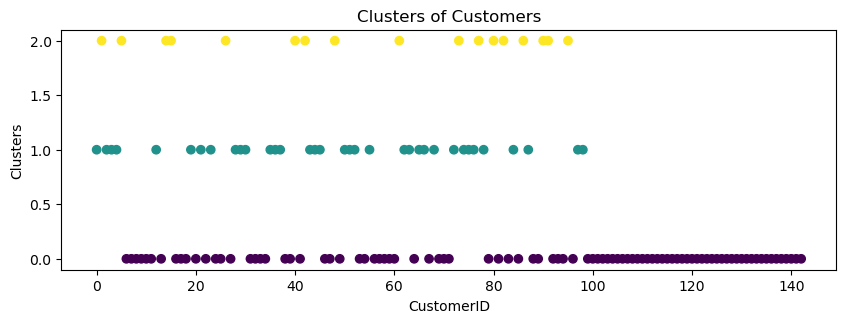

In [9]:
#Visualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

labels = k_means.labels_
print("\nLabels:")
print(labels)

data_with_clusters = data.copy()

data_with_clusters['Clusters'] = identified_clusters 

# index as x 
plt.scatter(data_with_clusters.index, data_with_clusters['Clusters'], c=identified_clusters, cmap='viridis')
plt.title('Clusters of Players')
plt.xlabel('Players')
plt.ylabel('Clusters')

plt.show()


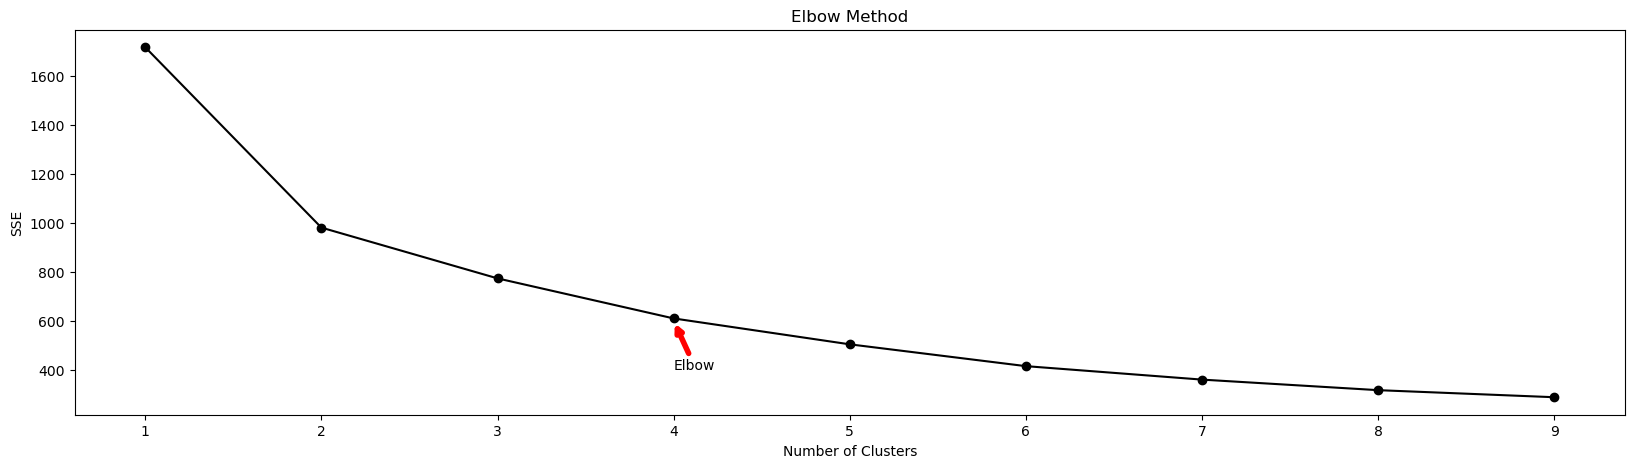

In [38]:
# Elbow Method
sse = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

number_clusters = range(1,10)
plt.figure(figsize=(20,5))  
plt.plot(number_clusters, sse, marker='o', color='black')
plt.annotate('Elbow', xy=(4,600), xytext=(4, 400), arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 4})
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')


plt.show()



In [39]:
k_means = KMeans(n_clusters=4, random_state= 42, n_init=1000)
k_means.fit(features_scaled)

centroids = k_means.cluster_centers_
identified_clusters = k_means.fit_predict(features_scaled)

data['Cluster'] = identified_clusters

data.head()



,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Cluster
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0,0,0,0,0.0,0,0,0,0,3
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0,0,0,0,0.0,0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0,0,0,0,0.0,0,0,0,0,3
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0,0,0,0,0.0,0,0,0,0,3
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0,0,0,0,0.0,0,0,0,0,3



Labels:
[3 0 3 3 3 0 1 1 1 1 1 1 3 1 0 0 1 2 1 3 2 3 2 3 1 3 0 1 3 3 3 1 1 1 1 3 3
 3 1 2 0 2 0 3 3 3 1 1 0 2 3 3 3 2 1 3 1 1 1 1 1 0 3 3 1 3 3 1 3 1 1 1 3 0
 3 3 3 0 3 1 0 1 0 1 3 1 0 3 2 1 0 0 1 2 1 0 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


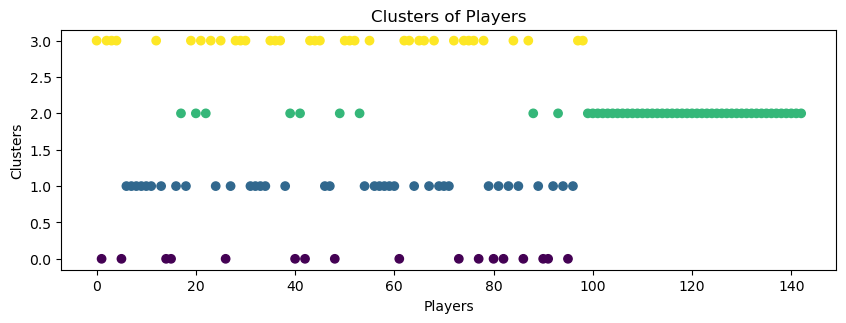

In [40]:
fig = plt.figure(figsize=(10,3))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

labels = k_means.labels_
print("\nLabels:")
print(labels)

data_with_clusters = data.copy()

data_with_clusters['Clusters'] = identified_clusters 

# index as x 
plt.scatter(data_with_clusters.index, data_with_clusters['Clusters'], c=identified_clusters, cmap='viridis')
plt.title('Clusters of Players')
plt.xlabel('Players')
plt.ylabel('Clusters')

plt.show()

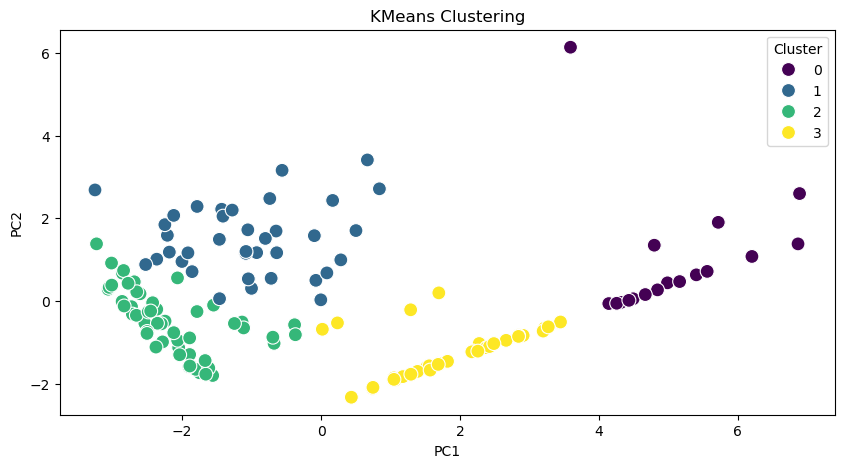

In [43]:
# Visualizing the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = identified_clusters

plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.show()


In [58]:
num_top_order = 3
num_middle_order = 2
num_all_rounders = 3
num_bowlers = 4

''' from the clusters, we can see that cluster 0 is for top order batsmen, 
cluster 1 is for all rounders ,cluster 2 is for bowlers 
and cluster 3 is for middle order batsmen and iam considering 3 top order batsmen(with highest  runs and strike rate),
 2 middle order batsmen(with highest runs and average rate),
   3 all rounders(with highest runs and wickets)
     and 4 bowlers(highest wickets and economy rate)'''

'''The performance of top batsmen is generally measured by using several different criteria, 
including the total number of runs scored (Runs.x), the highest score achieved (HS), the average score (Avg.x),
 and the strike rate (SR.x).

    Higher Runs.x are better, as they indicate the batsman's ability to score runs effectively.
    Higher HS is better, as it shows the batsman's capacity to make significant contributions to the team's total score.
    Higher Avg.x is better, as it reflects the batsman's consistency in scoring runs.
    Higher SR.x is better, as it shows the batsman's efficiency in scoring runs per ball faced.
'''

top_order = data_with_clusters[data_with_clusters['Cluster'] == 0]


'''The performance of middle-order batsmen is generally measured by using several different criteria,
  including the total number of runs scored (Runs.x), the average score (Avg.x), and the strike rate (SR.x).

    Higher Runs.x are better, as they indicate the batsman's ability to score runs effectively.
    Higher Avg.x is better, as it reflects the batsman's consistency in scoring runs.
    Higher SR.x is better, as it shows the batsman's efficiency in scoring runs per ball faced.
 '''


middle_order = data_with_clusters[data_with_clusters['Cluster'] == 3]


'''The performance of all-rounders is generally measured by using two different criteria,
  i.e. the total number of runs scored (Runs.x) and the total number of wickets taken (Wkts).
  
      Higher Runs.x are better, as they indicate the all-rounder's ability to score runs effectively.
      Higher Wkts are better, as they indicate the all-rounder's effectiveness in removing batsmen from the crease.
  '''

all_rounders = data_with_clusters[data_with_clusters['Cluster'] == 1]



'''The performance of bowlers is generally measured by using three different criteria, i.e. 
the average number of runs conceded per wicket taken (A), the economy rate (E), 
which is the average number of runs conceded per over bowled, and the strike rate (S), 
which is the average number of balls bowled per wicket taken.'''

'''
    Higher wickets are better, as they indicate the bowler's effectiveness in removing batsmen from the crease.
    Lower A (runs conceded per wicket) is better, as it indicates the bowler is economical.
    Lower E (economy rate) is better, as it indicates the bowler is able to restrict runs without needing to bowl too many overs.
    Lower S (strike rate) is better, as it indicates the bowler is able to take wickets without needing to bowl too many balls.
'''
bowlers = data_with_clusters[data_with_clusters['Cluster'] == 2]

print("\nTop Order Batsmen:")
print(top_order[['PLAYER', 'Runs.x', 'HS', 'SR.x']])
print("\nMiddle Order Batsmen:")
print(middle_order[['PLAYER', 'Runs.x', 'Avg.x']])
print("\nAll Rounders:")
print(all_rounders[['PLAYER', 'Runs.x', 'Wkts']])
print("\nBowlers:")
print(bowlers[['PLAYER', 'Wkts', 'Econ']])






Top Order Batsmen:
              PLAYER  Runs.x   HS    SR.x
42  Kane Williamson      735   84  142.44
73      Rishabh Pant     684  128  173.60
48      Lokesh Rahul     659   95  158.41

Middle Order Batsmen:
            PLAYER  Runs.x  Avg.x
28      Evin Lewis     382  29.38
3   Ajinkya Rahane     370  28.46

All Rounders:
           PLAYER  Runs.x  Wkts
89    Sunil 0rine     357    17
6   Andre Russell     316    13
33  Hardik Pandya     260    18

Bowlers:
             PLAYER  Wkts  Econ
138   Siddarth Kaul    21  8.28
140     Umesh Yadav    20  7.86
139     Trent Boult    18  8.84
115  Jasprit Bumrah    17  6.88


In [59]:
# Team Creation

team = pd.concat([top_order, middle_order, all_rounders, bowlers])
team.reset_index(drop=True, inplace=True)
print("\nTeam:")
print(team[['PLAYER', 'Runs.x', 'HS', 'SR.x', 'Wkts', 'Econ']])




Team:
              PLAYER  Runs.x   HS    SR.x  Wkts  Econ
0   Kane Williamson      735   84  142.44     0  0.00
1       Rishabh Pant     684  128  173.60     0  0.00
2       Lokesh Rahul     659   95  158.41     0  0.00
3         Evin Lewis     382   65  138.40     0  0.00
4     Ajinkya Rahane     370   65  118.21     0  0.00
5        Sunil 0rine     357   75  189.89    17  7.65
6      Andre Russell     316   88  184.79    13  9.38
7      Hardik Pandya     260   50  133.33    18  8.92
8      Siddarth Kaul       0    0    0.00    21  8.28
9        Umesh Yadav       0    0    0.00    20  7.86
10       Trent Boult       0    0    0.00    18  8.84
11    Jasprit Bumrah       0    0    0.00    17  6.88
